<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#NLP" data-toc-modified-id="NLP-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>NLP</a></span><ul class="toc-item"><li><span><a href="#Type-analyse" data-toc-modified-id="Type-analyse-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Type analyse</a></span></li><li><span><a href="#Trame-à-suivre-pour-travailler-en-NLP" data-toc-modified-id="Trame-à-suivre-pour-travailler-en-NLP-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Trame à suivre pour travailler en NLP</a></span><ul class="toc-item"><li><span><a href="#Récupérer-les-datas" data-toc-modified-id="Récupérer-les-datas-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Récupérer les datas</a></span></li><li><span><a href="#Prendre-connaissance-des-data" data-toc-modified-id="Prendre-connaissance-des-data-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Prendre connaissance des data</a></span></li><li><span><a href="#Clean-data-==&gt;-tout-dépend-tu-types-d'analyses-et-de-context" data-toc-modified-id="Clean-data-==>-tout-dépend-tu-types-d'analyses-et-de-context-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Clean data ==&gt; tout dépend tu types d'analyses et de context</a></span></li><li><span><a href="#Tokenisation-(=-encodage)" data-toc-modified-id="Tokenisation-(=-encodage)-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Tokenisation (= encodage)</a></span></li><li><span><a href="#LSTM-==&gt;-Long-Short_term-Memory-(vs-GRU)" data-toc-modified-id="LSTM-==>-Long-Short_term-Memory-(vs-GRU)-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>LSTM ==&gt; Long-Short_term-Memory (vs GRU)</a></span></li></ul></li></ul></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Manipulation-Data-==&gt;-Ajouter-de-la-data" data-toc-modified-id="Manipulation-Data-==>-Ajouter-de-la-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Manipulation Data ==&gt; Ajouter de la data</a></span></li><li><span><a href="#Stationnarity" data-toc-modified-id="Stationnarity-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stationnarity</a></span></li><li><span><a href="#Bootstrap" data-toc-modified-id="Bootstrap-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Bootstrap</a></span></li><li><span><a href="#Create-Target" data-toc-modified-id="Create-Target-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Create Target</a></span></li><li><span><a href="#Split-Data" data-toc-modified-id="Split-Data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Split Data</a></span></li><li><span><a href="#Scale" data-toc-modified-id="Scale-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Scale</a></span></li><li><span><a href="#Split-X/Y" data-toc-modified-id="Split-X/Y-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Split X/Y</a></span></li><li><span><a href="#Creation-Model" data-toc-modified-id="Creation-Model-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Creation Model</a></span></li><li><span><a href="#Calcul-Error" data-toc-modified-id="Calcul-Error-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Calcul Error</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Random-Search" data-toc-modified-id="Random-Search-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Random Search</a></span></li><li><span><a href="#Keras-tuner" data-toc-modified-id="Keras-tuner-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Keras tuner</a></span></li><li><span><a href="#Sklearn" data-toc-modified-id="Sklearn-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Sklearn</a></span></li></ul></div>

## Import

In [1]:
# MLP for the IMDB problem
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from random import randint
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from tensorflow.keras.utils import to_categorical
import string
import pandas as pd
import numpy as np
from string import punctuation
from os import listdir
from collections import Counter
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
plt.rcParams["figure.figsize"] = (20,10)
import warnings
plt.rcParams["figure.autolayout"] = True
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /Users/mc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Résumé jusqu'à présent
## NLP
### Type analyse
- Analyse de sentiment ==> voir une critique de film pos/neg (classificiation)
- Generation de texte
- Traduction
- Résumé de texte 
- Ajouter un titre à une image....

### Trame à suivre pour travailler en NLP
####  Récupérer les datas
#### Prendre connaissance des data
#### Clean data ==> tout dépend tu types d'analyses et de context
    - Enlève majuscule
    - Enlève la ponctuation
    - Enlève stop words (= petits mots, pronoms etc)
    - Simplification des termes 
    
    
#### Tokenisation (= encodage)
 - ==> Transformer un mot en valeur numérique 
 - Bag of words ==> Mettre les mots dans un vecteur en fonction 
     - Frequence 
     - Nombre d'occurence 
     - Binary
     - .....
     - Problèmes:
              - taille du vecteur == taille du vocab ==> limite computationelle parce qu'il peut être très grand
              - Mot ayant le même sens sont intégrés de la même façon que des mots contraires, pas de relation sémantique 
              
- Embedding ==> Mettre les mots dans un vecteurs aynant une relation sémantique
    - Word2vec (300 dimensions) // Glove ==> entraine un réseau à deviner le mots dans un contexte donnée
    
    
- Chaque mot est encodé avec une seule valeur 
    - La machine peut interprété qu'une grande valeur c'est important 
        - ==> Normalise ==> réduit les valeurs
             
             
#### LSTM ==> Long-Short_term-Memory (vs GRU) 
   - Cell state = mémoire intégrée ==> il se souvient de ce qu'il se passe avant ==> utile pour les séquences
   - Modifier cette mémoire à l'aide de porte (forget, tanh, ....) ==> 4
   - Time-Series // NLP 

## Load Data

In [87]:
directory_case = '/Users/mc/Documents/Cours/CONVENIENT_global_confirmed_cases.csv'
df_case = pd.read_csv(directory_case).iloc[1:].rename(columns={'Country/Region':'Date'}).set_index('Date')
df_case.index = pd.to_datetime(df_case.index)
df_case = df_case.astype(float)
df_case

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-19,120.0,0.0,7.0,0.0,0.0,0.0,55.0,0.0,0.0,937.0,...,0.0,13.0,8.0,55.0,2728.0,0.0,0.0,0.0,265.0,199.0
2022-05-20,27.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,822.0,...,0.0,13.0,7.0,64.0,1587.0,0.0,0.0,0.0,0.0,263.0
2022-05-21,50.0,106.0,4.0,0.0,0.0,0.0,32.0,0.0,0.0,743.0,...,0.0,42.0,0.0,28.0,1457.0,0.0,0.0,0.0,154.0,0.0


<AxesSubplot:xlabel='Date'>

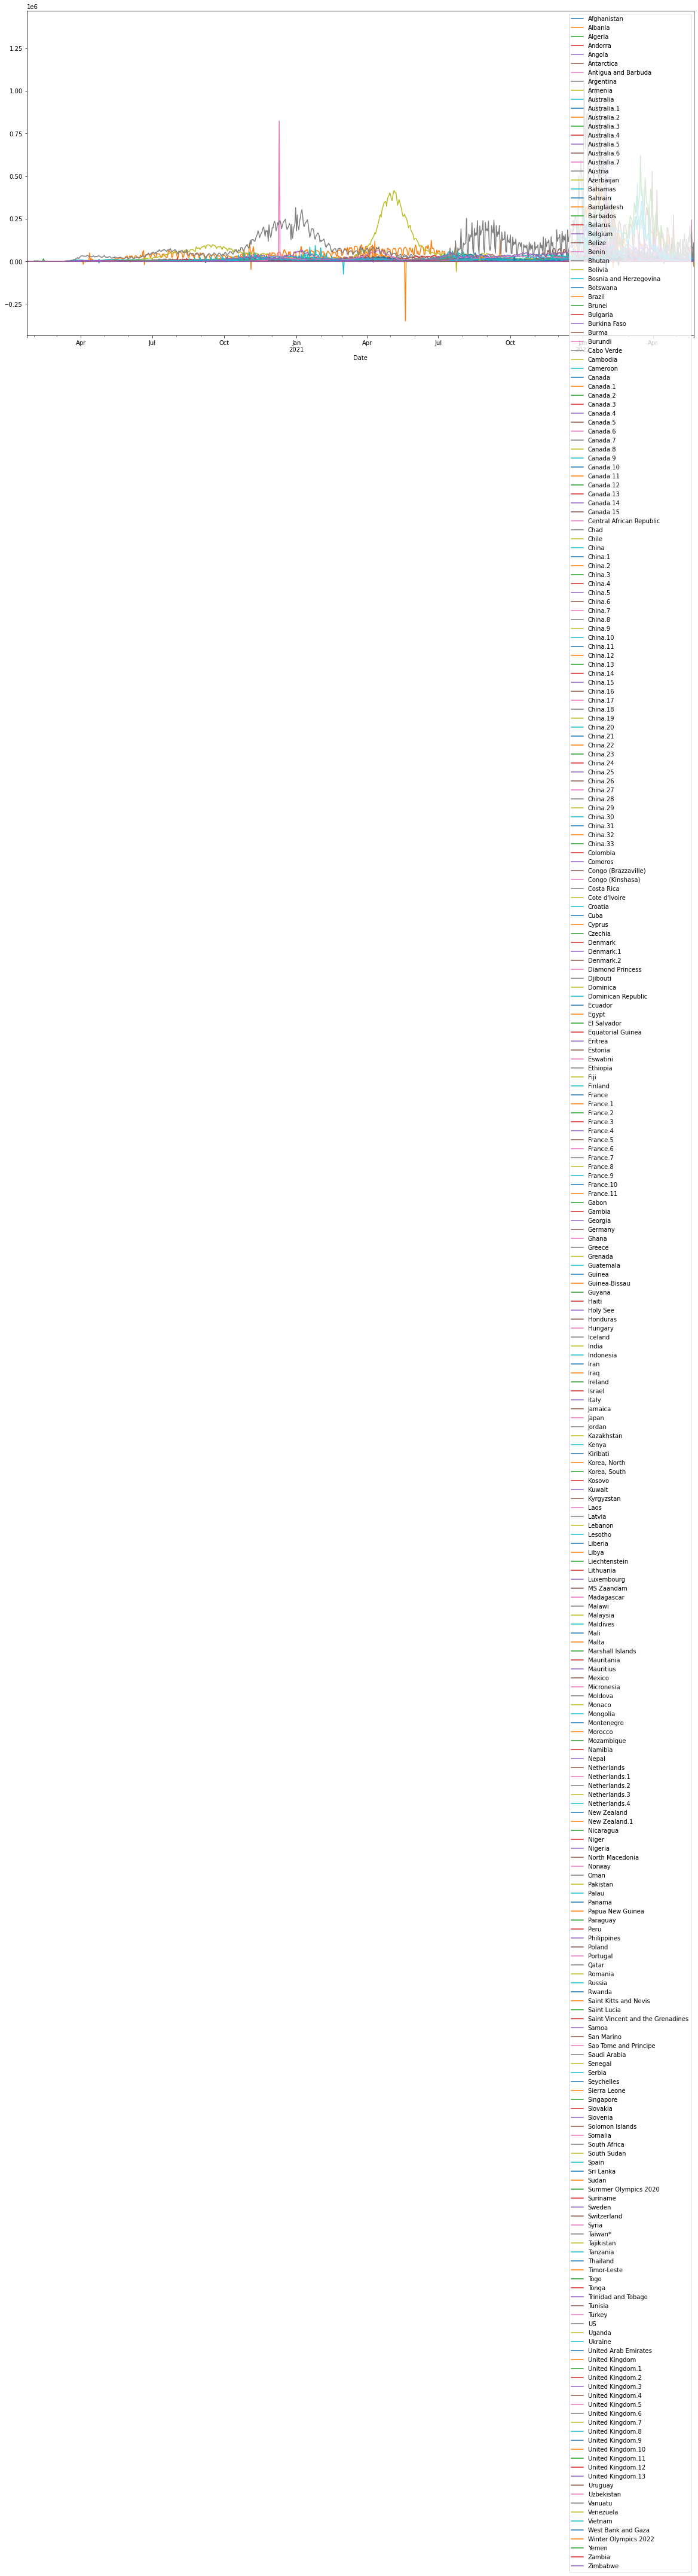

In [5]:
df_case.plot()

In [79]:
def clean_data(directory):
    df = pd.read_csv(directory).iloc[1:].rename(columns={'Country/Region':'Date'}).set_index('Date')
    df.index = pd.to_datetime(df.index)
    df = df.astype(float)
    return df
directory_death = '/Users/mc/Documents/Cours/CONVENIENT_global_deaths.csv'
df_death = clean_data(directory_death)

In [96]:
df_clean['Germany'].iloc[700:].div(df_clean['Germany'].iloc[700:].max())

Date
2022-01-19    0.212940
2022-01-20    0.253155
2022-01-21    0.265713
2022-01-22    0.256804
2022-01-23    0.161976
                ...   
2022-05-19    0.092723
2022-05-20    0.080334
2022-05-21    0.007248
2022-05-22    0.002360
2022-05-23    0.122158
Name: Germany, Length: 125, dtype: float64

## Manipulation Data ==> Ajouter de la data

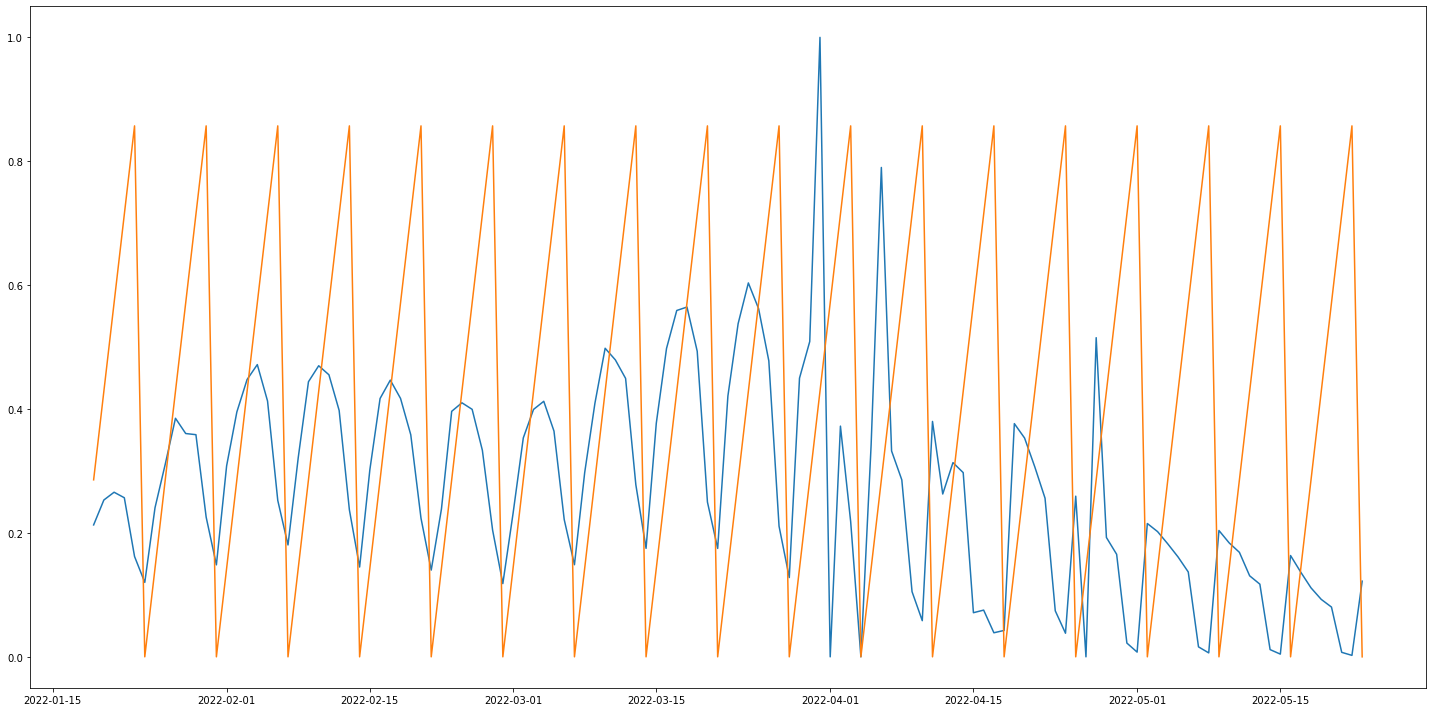

In [102]:
plt.plot(df_clean['Germany'].iloc[700:].div(df_clean['Germany'].iloc[700:].max()), label = 'Case')
plt.plot(pd.DataFrame(df_clean['Germany'].iloc[700:].index.weekday, 
             index=df_clean['Germany'].iloc[700:].index).div(7), label = 'Weekday')

<AxesSubplot:xlabel='Date'>

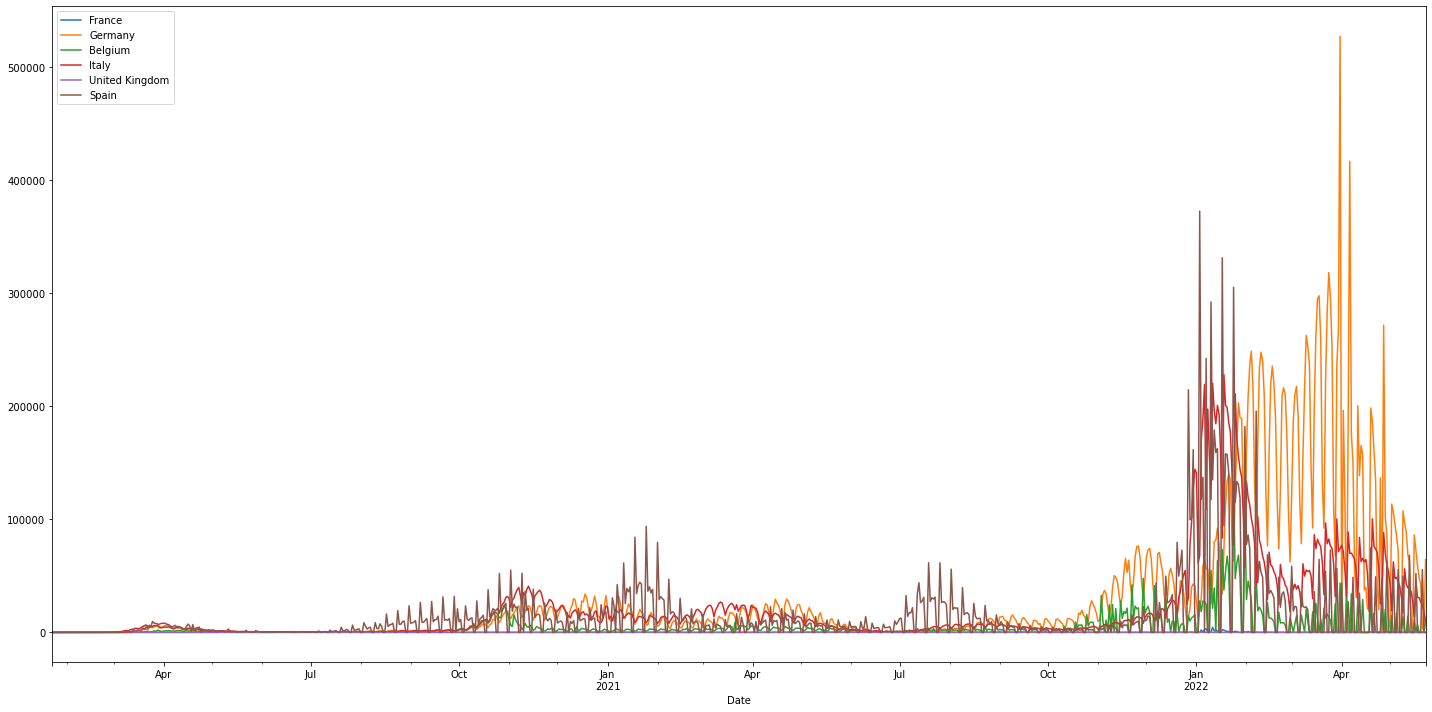

In [33]:
import copy
df_clean = copy.deepcopy(df_case[['France', 'Germany', 'Belgium','Italy', 'United Kingdom','Spain']])
df_clean[df_clean<0] = 0
df_clean.plot()

In [34]:
rolling = []
rolling_name = []
for i in [7, 14, 28]:
    rolling.append(df_clean.rolling(window=i).mean().add_prefix("Rolling_"+str(i)+' '))
    
df_clean = pd.concat([df_clean , pd.concat(rolling,1)],1)




In [35]:
df_clean = df_clean.dropna()
df_clean

,France,Germany,Belgium,Italy,United Kingdom,Spain,Rolling_7 France,Rolling_7 Germany,Rolling_7 Belgium,Rolling_7 Italy,...,Rolling_14 Belgium,Rolling_14 Italy,Rolling_14 United Kingdom,Rolling_14 Spain,Rolling_28 France,Rolling_28 Germany,Rolling_28 Belgium,Rolling_28 Italy,Rolling_28 United Kingdom,Rolling_28 Spain
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-19,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.071429,0.000000,0.071429,0.000000,0.571429,0.035714,0.107143,0.000000,0.071429
2020-02-20,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.071429,0.000000,0.071429,0.000000,0.571429,0.035714,0.107143,0.000000,0.071429
2020-02-21,0.0,0.0,0.0,17.0,0.0,0.0,0.000000,0.000000,0.000000,2.428571,...,0.000000,1.214286,0.000000,0.071429,0.000000,0.571429,0.035714,0.714286,0.000000,0.071429
2020-02-22,0.0,0.0,0.0,42.0,0.0,0.0,0.000000,0.000000,0.000000,8.428571,...,0.000000,4.214286,0.000000,0.071429,0.000000,0.571429,0.035714,2.214286,0.000000,0.071429
2020-02-23,0.0,0.0,0.0,93.0,0.0,0.0,0.000000,0.000000,0.000000,21.714286,...,0.000000,10.857143,0.000000,0.000000,0.000000,0.571429,0.035714,5.535714,0.000000,0.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-19,0.0,48910.0,0.0,30722.0,0.0,0.0,132.142857,48035.285714,2556.571429,31916.428571,...,3282.642857,35398.071429,23.428571,16125.214286,62.464286,71136.821429,4232.214286,44420.071429,13.750000,15797.892857
2022-05-20,0.0,42375.0,0.0,26818.0,0.0,0.0,0.000000,45251.857143,2556.571429,30172.000000,...,3282.642857,34144.785714,23.428571,12155.357143,48.642857,67825.964286,4232.214286,42744.142857,13.750000,14042.785714
2022-05-21,0.0,3823.0,0.0,24246.0,0.0,55572.0,0.000000,44919.285714,2556.571429,28445.142857,...,3282.642857,32963.571429,23.428571,16124.785714,48.642857,66563.250000,4232.214286,41073.357143,13.750000,16027.500000


## Stationnarity

In [27]:
def test_stationnarity(df):

    from statsmodels.tsa.stattools import adfuller
    from numpy import log

    ## Faire un test adfuller pour toutes les colonnes
    result_stationnary = []
    for i in df.columns:
        result_stationnary.append(adfuller(df[i])[1])

    resultat_df = pd.DataFrame(result_stationnary, index=df.columns)

    ## Selectionner toutes les colonnes non stationnaires
    resultat_df_above_005 = resultat_df[resultat_df>0.05].dropna()

    ## faire la diff de ces colonnes
    for i in resultat_df_above_005.index:
        df[i]= df[i].diff()

    df = df.dropna()

    ## Reaire un test adfuller pour toutes les colonnes
    result_stationnary_2 = []
    for i in df.columns:
        result_stationnary_2.append(adfuller(df[i])[1])

    resultat_df_2 = pd.DataFrame(result_stationnary_2, index=df.columns)
    resultat_df_2_above_005 = resultat_df_2[resultat_df_2>0.05].dropna()
    return df, resultat_df_above_005

df_clean, resultat_df_above_005 = test_stationnarity(df_clean)
resultat_df_above_005

,0
Germany,0.246654
United Kingdom,0.221052
Rolling_7 Germany,0.350348
Rolling_7 Italy,0.063586
Rolling_7 United Kingdom,0.277851
Rolling_14 Germany,0.303450
Rolling_14 United Kingdom,0.346858
Rolling_28 Germany,0.288358
Rolling_28 Belgium,0.312446
Rolling_28 Italy,0.366936


## Bootstrap

In [60]:
from joblib import Parallel, delayed
import random
from collections import deque 

def seasonal_bootstrap(df, freq, shift_max=0, n_samples=1, replace=False,
                       n_jobs=1):

    leap_mask = (~((df.index.month == 2) & (df.index.day == 29)))
    new_df = df.copy() #df without leap years
    new_df = new_df[leap_mask]       
    parallel = Parallel(n_jobs=n_jobs)
    
    def create_seasonal_bootstrap(i):
        """
        Returns
        -------
        df_res : pd.DataFrame
            seasonally bootstrapped data
        """
        random.seed(i)
                
        if replace == True:
            index = new_df.index
            blocks = create_blocks(new_df, freq, shift_max)
            #convert list of blocks into array of blocks in order to use indexing
            b = np.empty(len(blocks), dtype=object)
            b[:] = blocks
            blocks = b
            lengths = [len(block) for block in blocks]
            ndays = np.bincount(lengths).argmax()
            blocks_to_shuffle = np.where(lengths == ndays)[0]
            new_indices = np.copy(blocks_to_shuffle)
            new_indices = np.random.choice(new_indices, len(new_indices),
                                           replace=True)
            blocks[blocks_to_shuffle]=blocks[new_indices]
                
        else:
            index = df.index
            blocks = create_blocks(df, freq, shift_max)
            random.shuffle(blocks)
        
        #out-of-bag indices
        
                
        df_res =  pd.concat(blocks)

        if isinstance(df_res, pd.DataFrame):
            df_res.set_index(index, inplace=True)
            
        else:
            df_res.index = index
            
        return df_res
    
    
    return parallel(
            delayed(create_seasonal_bootstrap)(i) for i in range(n_samples)
            )

def create_blocks(df, freq, shift_max=0):
  
    shift = random.randint(-shift_max, shift_max)
    df = df.shift(shift)
    #we retrieve groups through the groupby method            
    blocks = deque([gp[1] for gp in df.groupby(pd.Grouper(freq=freq))])
        
    return blocks



#df_clean =  df.interpolate(method = 'linear').ffill().bfill().drop_duplicates()


bootstrap_samples = seasonal_bootstrap(df=df_clean,
                                       freq='2M',
                                       shift_max=0,
                                       n_samples=6,
                                       replace=True,
                                       n_jobs=1)

df_bootstrap = bootstrap_samples[2]

## Create Target

In [68]:
df_bootstrap

,France,Germany,Belgium,Italy,United Kingdom,Spain,Rolling_7 France,Rolling_7 Germany,Rolling_7 Belgium,Rolling_7 Italy,...,Rolling_14 Italy,Rolling_14 United Kingdom,Rolling_14 Spain,Rolling_28 France,Rolling_28 Germany,Rolling_28 Belgium,Rolling_28 Italy,Rolling_28 United Kingdom,Rolling_28 Spain,Target
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-19,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.071429,0.000000,0.071429,0.000000,0.571429,0.035714,0.107143,0.000000,0.071429,0.0
2020-02-20,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.071429,0.000000,0.071429,0.000000,0.571429,0.035714,0.107143,0.000000,0.071429,0.0
2020-02-21,0.0,0.0,0.0,17.0,0.0,0.0,0.000000,0.000000,0.000000,2.428571,...,1.214286,0.000000,0.071429,0.000000,0.571429,0.035714,0.714286,0.000000,0.071429,17.0
2020-02-22,0.0,0.0,0.0,42.0,0.0,0.0,0.000000,0.000000,0.000000,8.428571,...,4.214286,0.000000,0.071429,0.000000,0.571429,0.035714,2.214286,0.000000,0.071429,84.0
2020-02-23,0.0,0.0,0.0,93.0,0.0,0.0,0.000000,0.000000,0.000000,21.714286,...,10.857143,0.000000,0.000000,0.000000,0.571429,0.035714,5.535714,0.000000,0.071429,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-19,0.0,48910.0,0.0,30722.0,0.0,0.0,132.142857,48035.285714,2556.571429,31916.428571,...,35398.071429,23.428571,16125.214286,62.464286,71136.821429,4232.214286,44420.071429,13.750000,15797.892857,NaN
2022-05-20,0.0,42375.0,0.0,26818.0,0.0,0.0,0.000000,45251.857143,2556.571429,30172.000000,...,34144.785714,23.428571,12155.357143,48.642857,67825.964286,4232.214286,42744.142857,13.750000,14042.785714,NaN
2022-05-21,0.0,3823.0,0.0,24246.0,0.0,55572.0,0.000000,44919.285714,2556.571429,28445.142857,...,32963.571429,23.428571,16124.785714,48.642857,66563.250000,4232.214286,41073.357143,13.750000,16027.500000,NaN


<AxesSubplot:xlabel='Date'>

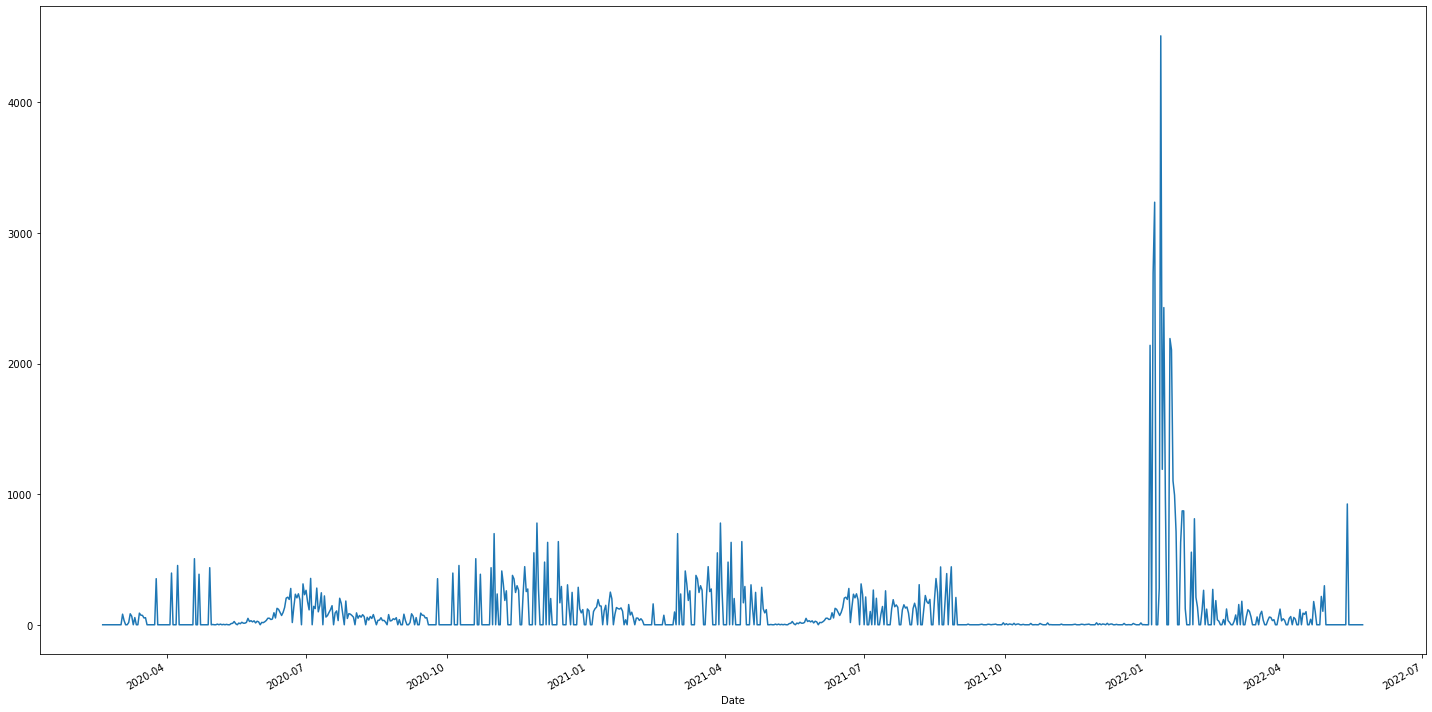

In [73]:
df_bootstrap['France'].plot()

<AxesSubplot:xlabel='Date'>

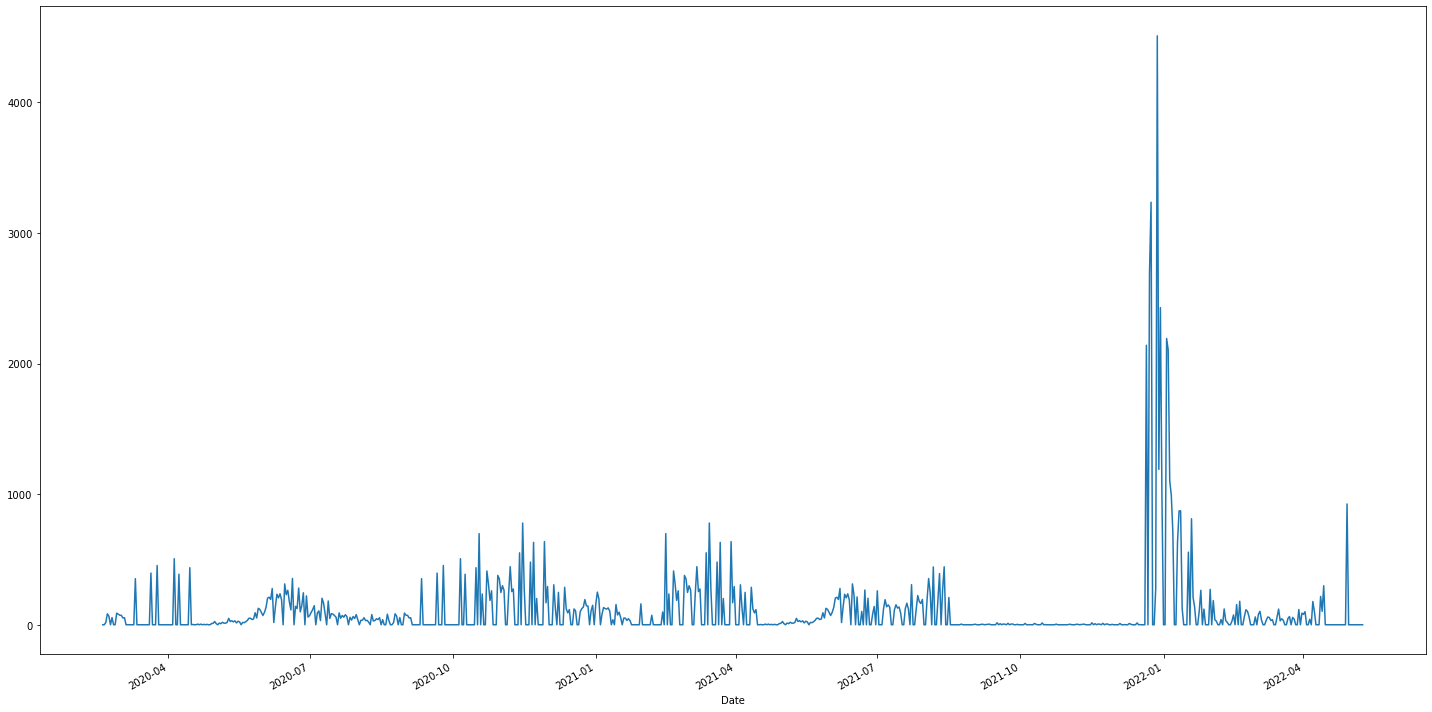

In [80]:
df_bootstrap['Target']= df_bootstrap['France'].shift(-14).dropna()
df_bootstrap['Target'].plot()

## Split Data

In [81]:
def split_data(df, split_fraction):
    split_size = round(len(df)*split_fraction)
    train = df[:split_size]
    test = df[split_size:]
    return train, test

train_split, test_split = split_data(df_bootstrap.dropna(), 0.7)

print('train_split.shape',train_split.shape)
print('test_split.shape',test_split.shape)

train_split.shape (567, 25)
test_split.shape (243, 25)


## Scale

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
## Fit Training || Rescale both train + test set
scaler_train = MinMaxScaler()#StandardScaler()
scaler_train = scaler_train.fit(train_split)
scaled_train = scaler_train.transform(train_split)
scaled_test = scaler_train.transform(test_split)

## Split X/Y

In [83]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
    return np.array(X)[:,:,:-1], np.array(X)[:,:,-1]



## 
X_train, Y_train = split_sequence(scaled_train , 14)
print(X_train.shape)
print(Y_train.shape)

X_test, Y_test = split_sequence(scaled_test, 14)
print(X_test.shape)
print(Y_test.shape)

(553, 14, 24)
(553, 14)
(229, 14, 24)
(229, 14)


## Creation Model

In [ ]:
dense = [1, 5, 10, 20, 50, 100]

In [ ]:
lr = [0.5, 0.1, 0.05, 0.01, 0.005]

In [120]:
from keras.layers.core import Dropout
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam

# Build a Model
model = Sequential()
model.add(LSTM(10, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(10, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(10))
model.add(Dropout(0.2))
model.add(Dense(Y_train.shape[1], activation='tanh'))

model.summary()
opt = Adam()
model.compile(optimizer=opt, loss='mse', metrics=['mae'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 14, 10)            1400      
                                                                 
 dropout_18 (Dropout)        (None, 14, 10)            0         
                                                                 
 lstm_20 (LSTM)              (None, 14, 10)            840       
                                                                 
 dropout_19 (Dropout)        (None, 14, 10)            0         
                                                                 
 lstm_21 (LSTM)              (None, 10)                840       
                                                                 
 dropout_20 (Dropout)        (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 14)               

In [110]:
# Fit a model
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=10, batch_size=2)


Epoch 1/10


2022-06-01 12:32:52.767599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 12:32:53.091623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 12:32:53.154705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 12:32:53.205328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 12:32:53.289871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  1/277 [..............................] - ETA: 7:40 - loss: 0.0851 - mae: 0.1539

2022-06-01 12:32:53.387802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 12:32:53.470305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


277/277 [==============================] - ETA: 0s - loss: 0.0335 - mae: 0.1253

2022-06-01 12:32:59.500815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 12:32:59.601459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 12:32:59.639538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 12:32:59.680129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


277/277 [==============================] - 9s 26ms/step - loss: 0.0335 - mae: 0.1253 - val_loss: 0.4595 - val_mae: 0.2190
Epoch 2/10
277/277 [==============================] - 7s 24ms/step - loss: 0.0303 - mae: 0.1265 - val_loss: 0.4570 - val_mae: 0.2181
Epoch 3/10
277/277 [==============================] - 7s 24ms/step - loss: 0.0299 - mae: 0.1257 - val_loss: 0.4530 - val_mae: 0.2193
Epoch 4/10
277/277 [==============================] - 7s 24ms/step - loss: 0.0297 - mae: 0.1251 - val_loss: 0.4531 - val_mae: 0.2186
Epoch 5/10
277/277 [==============================] - 7s 24ms/step - loss: 0.0294 - mae: 0.1238 - val_loss: 0.4502 - val_mae: 0.2199
Epoch 6/10
277/277 [==============================] - 7s 24ms/step - loss: 0.0291 - mae: 0.1234 - val_loss: 0.4495 - val_mae: 0.2216
Epoch 7/10
277/277 [==============================] - 7s 24ms/step - loss: 0.0289 - mae: 0.1223 - val_loss: 0.4496 - val_mae: 0.2211
Epoch 8/10
277/277 [==============================] - 7s 24ms/step - loss: 0.028

## Calcul Error


<AxesSubplot:>

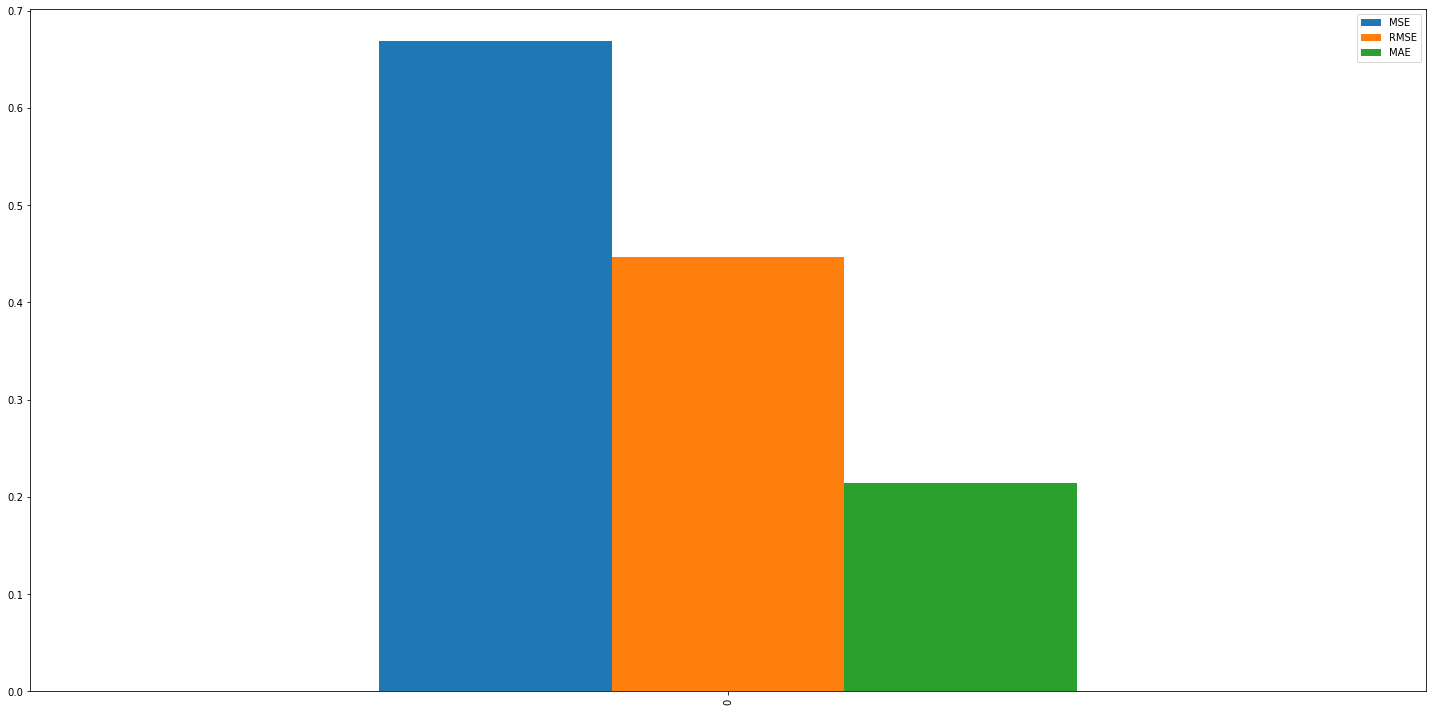

In [112]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def error(df_actual, df_predicted):
    mse = mean_squared_error(df_actual, df_predicted, squared=False)
    rmse  = mean_squared_error(df_actual, df_predicted, squared=True)
    mae =  mean_absolute_error(df_actual, df_predicted)
    return mse, rmse, mae
predicted = model.predict(X_test)

pd.DataFrame(error(Y_test, predicted), index=['MSE','RMSE',"MAE"]).T.plot.bar()

## Grid Search
- Choisir 2 paramètres
- Choisir pour ces 2 paramètres un ensemble de valeurs (5 valeurs possibles)
- Entrainer le réseau dans une for loop pour la totalité des combinaison
- Récupérer le nombre de paramètre + erreurs

In [327]:
#def layers(model, nb_denseS):
#    model.add(LSTM(10))
#    model.add(Dropout(0.2))
#    return model

def creation_model(nb_dense, batch_size, X_train, Y_train, X_test, Y_test):
    # Build a Model
    model = Sequential()
    model.add(LSTM(nb_dense, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(nb_dense))
    
    model.add(Dense(Y_train.shape[1], activation='tanh'))

    opt = Adam(lr=0.0001)
    model.compile(optimizer=opt, loss='mse')
    model.fit(X_train, Y_train, validation_data = (X_test, Y_test), 
              epochs=10, batch_size=batch_size, verbose=1)
    return model

